In [243]:
import math
import numpy as np
import matplotlib.pyplot as plt 
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True' #sometimes matplotlib leads kernel to die
import torch

In [244]:
class act_func(object):
    def __init__(self):
        self.grad = None
        self.res = None
        self.formula = None

    def relu(self,x): #if x > 0 gradient 1 else gradient 0
        if type(x) == list:
            x = np.array(x)
        self.res=np.where(x>0,x,0)
        self.grad = np.where(x>0,1,0)
        self.formula = "np.where(x>0,x,0)"
        return  self.res

    def sigmoid(self,x):
        if type(x) == list:
            x = np.array(x)
        self.res = 1 / (1 + np.exp(-x))  
        self.grad = self.res*(1-self.res)
        self.formula ="1 / (1 + np.exp(-x))"
        return self.res
    def tanh(self,x):
        if type(x) == list:
            x = np.array(x)
        self.res =  (np.exp(2*x) - 1)/(np.exp(2*x) + 1)  
        self.grad = 1-(self.res)**2
        self.formula ="(np.exp(2*x) - 1)/(np.exp(2*x) + 1)"
        return self.res
    def ELU(self,x,a =1):
        if type(x) ==list:
            x = np.array(x)
        self.res = np.where(x>0,x,a*(np.exp(x)-1))  
        self.grad = np.array([1 if j>0 else a*np.exp(j) for j in self.res])
        self.formula ="np.where(x>0,x,a*(np.exp(x)-1)) "
        return self.res

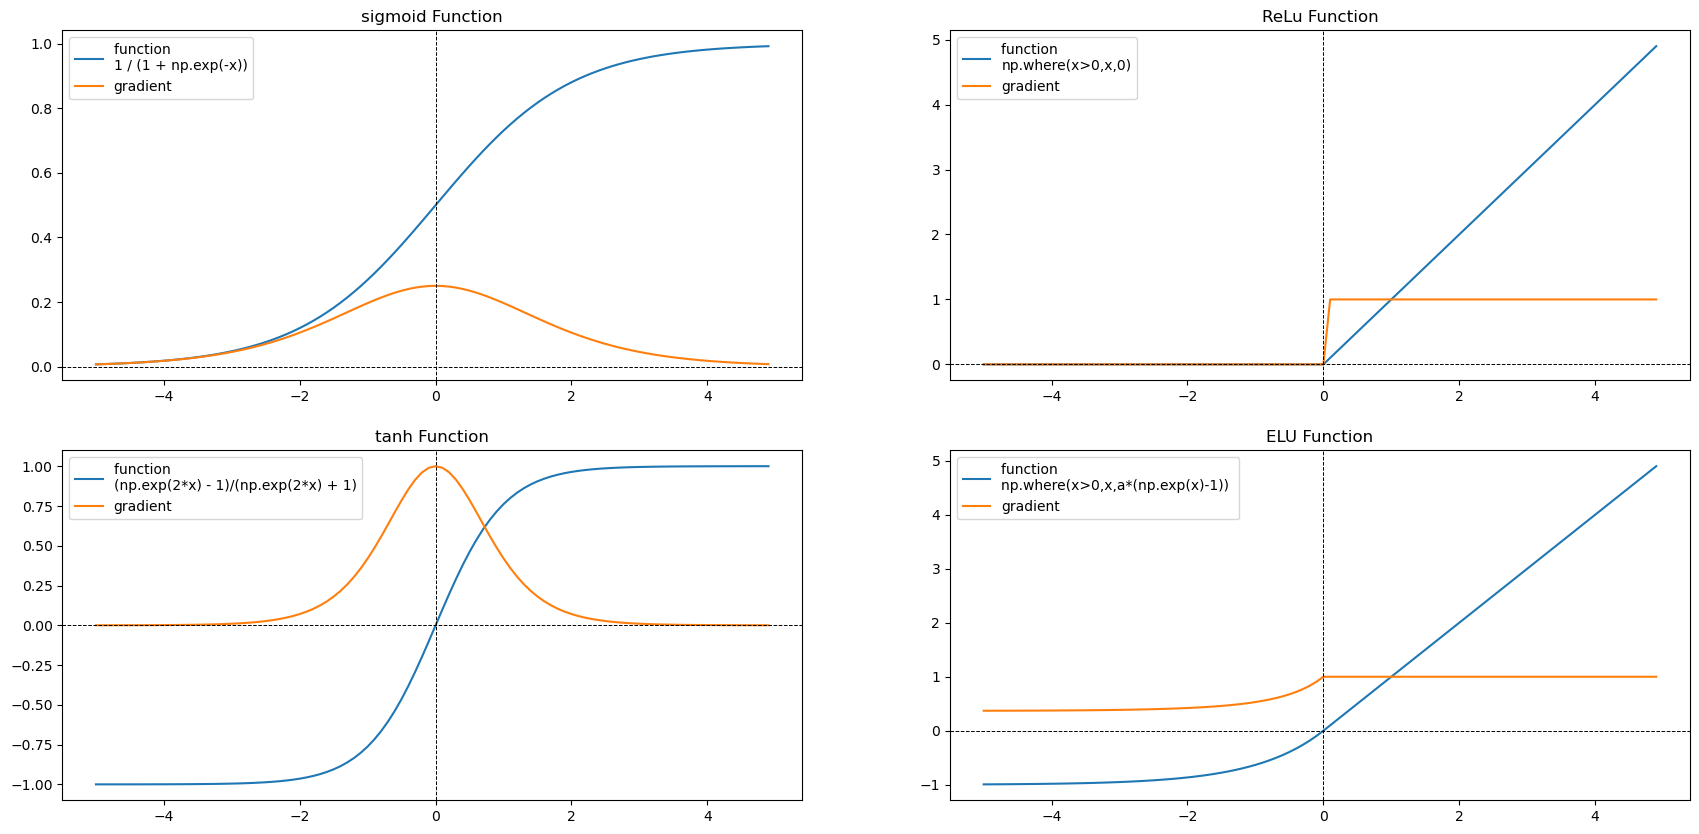

In [245]:

bla = [i/10 for i in range(-50,50)]
f = act_func()
space = {"sigmoid":f.sigmoid,"ReLu":f.relu,"tanh":f.tanh,"ELU":f.ELU}
spacelist=[(i,s) for i,s in space.items()]

fig, ax = plt.subplots(2, 2,figsize=(21,10))

for row in range(2):
    spacelistt =spacelist[row*2:row*2+2]  # 0=> [0:2] 1 => [2:4]
    for i in range(2):
        ax[row][i].plot(bla,spacelistt[i][1](bla),label=f"function \n{f.formula}")
        ax[row][i].plot(bla,f.grad,label="gradient")
        ax[row][i].set_title(f"{spacelistt[i][0]} Function")
        ax[row][i].legend(loc=0)
        ax[row][i].legend()
        ax[row][i].axhline(0, color="black",linestyle="--",linewidth=0.7)
        ax[row][i].axvline(0, color="black",linestyle="--",linewidth=0.7)



In [646]:
class lossfunc(object):
    def __init__(self):
        self.joker = None
        
    def arr(self,x): #just for making lists to arrays
        if type(x) == list:
            x = np.array(x)
        return x 
    #Regression Loss
    def error(self,y,ypred):
        y,ypred = self.arr(y),self.arr(ypred)
        return (y-ypred)
    
    def squared_error(self,y,ypred):
        y,ypred = self.arr(y),self.arr(ypred)
        return (y-ypred)**2
    
    def absolute_error(self,y,ypred):
        y,ypred = self.arr(y),self.arr(ypred)
        return abs(y-ypred)
    
    def huber_loss(self,y,ypred,delta=0.3):
        y,ypred = self.arr(y),self.arr(ypred)
        return np.where(abs(y-ypred)<=delta,0.5*(y-ypred)**2,delta*abs(y-ypred)-0.5*delta**2)    
    #Classification
    
    def cross_entropy_prob(self,y,ypred):
        y,ypred = self.arr(y),self.arr(ypred)
        ypred = np.where(ypred==0,0.01,ypred) #for smoothing this can be used  and also preventing inf result by taking log o zero
        ypred = np.where(ypred ==1,0.99,ypred)  #getting rid of the error
        return -1*y*np.log(ypred) + -1*(1-y)*np.log(1-ypred)
    def hinge_loss(self,y,ypred): # for SVM
        y,ypred = self.arr(y),self.arr(ypred)
        out=1-y*ypred
        return np.where(out<=0,0,out)

    
    
    

In [648]:
l = lossfunc()
space = {"error":l.error,"squared_error":l.squared_error,"absolute_error":l.absolute_error,"huber_loss":l.huber_loss,
         "cross_entropy_prob":l.cross_entropy_prob,
        "hinge_loss":l.hinge_loss}
spacelist=[(i,s) for i,s in space.items()]


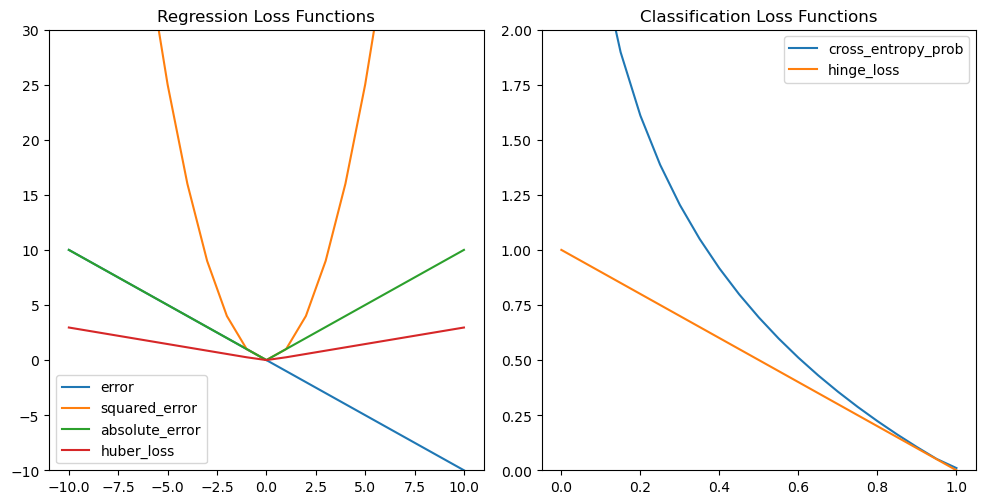

In [650]:
#regression a1,a2
#classification y1,y2
val = 10
a2= [0 for _ in range(-val,val+1)]
a1 = [i for i in range(-val,val+1)]
y2 = [1 for _ in range(21)]
y1=np.linspace(0,1,val*2 +1)
fig, ax = plt.subplots(1, 2,figsize=(10,5))
fig.tight_layout() 

for i in range(6):
    if i <= 3:
        x = a1
        y = a2
        w = 0
        title = "Regression Loss Functions"
    else:
        x = y1
        y = y2
        w = 1
        title = "Classification Loss Functions"
    ax[w].plot(x,spacelist[i][1](y,x),label = f"{spacelist[i][0]}")
    ax[w].legend(loc=0)
    ax[w].set_title(title)
    ax[0].set_ylim(-10,30)
    ax[1].set_ylim(0,2)



